In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

**Simple preprocessing**

In [3]:
data = pd.read_csv("/content/loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Dropping loan_id and cleaning the spaces from column names**

In [4]:
data.drop('loan_id',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [6]:
columns = np.asarray(data.columns)
columns

array([' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype=object)

In [7]:
cleaned_columns = [col.strip() for col in columns]
rename_dict = dict(zip(columns, cleaned_columns))
data.rename(columns=rename_dict, inplace=True)

data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
data[['education','self_employed','loan_status']]= data[['education','self_employed','loan_status']].astype('category')

In [9]:
data.isna().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [10]:
data.duplicated().sum()

np.int64(0)

EDA

In [11]:
data.shape

(4269, 12)

In [12]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


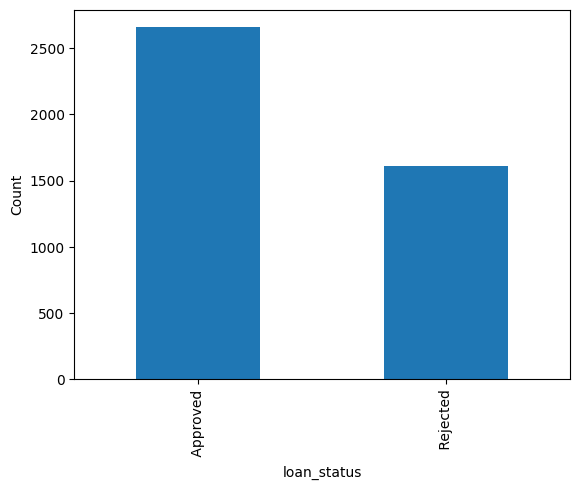

In [13]:

data['loan_status'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show( )
#Most loans are approved

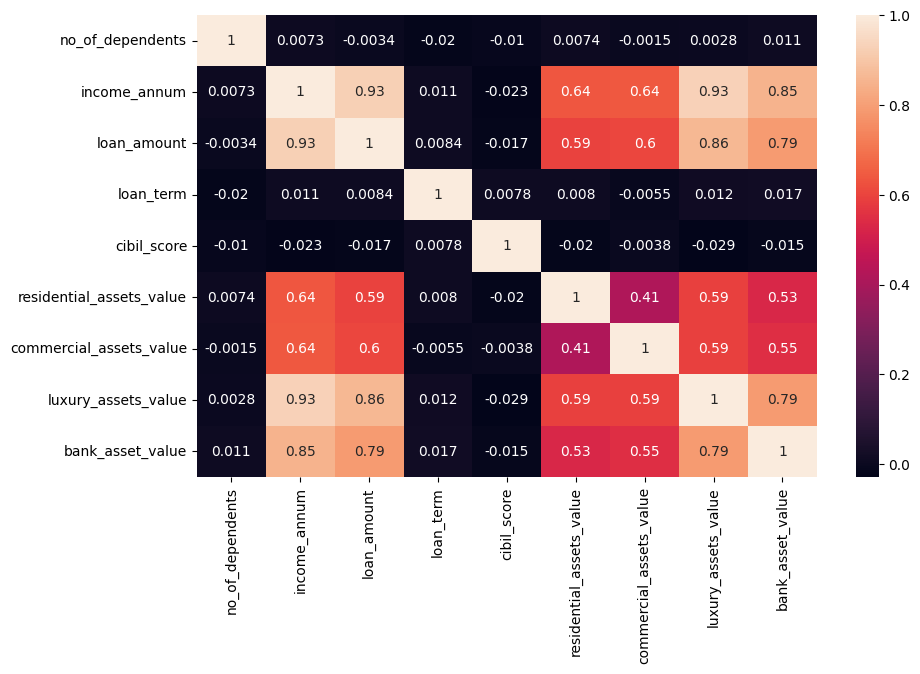

In [14]:
from seaborn import heatmap
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
heatmap(corr,annot=True)
plt.show()

**Dropping income_annum and loan_amount as the have high multicollinearity with other features**

In [15]:
data.drop(['loan_amount','income_annum'],axis=1,inplace=True)

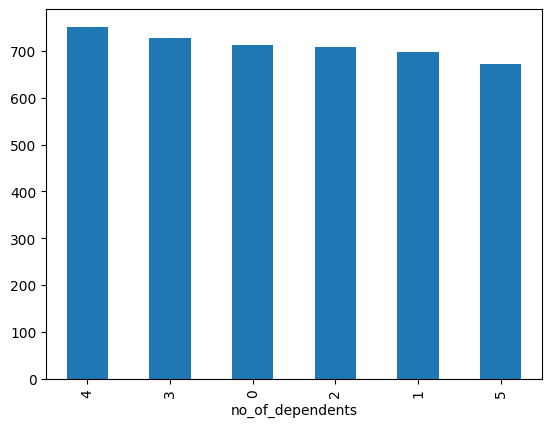

In [16]:
data['no_of_dependents'].value_counts().plot(kind='bar')
plt.show()

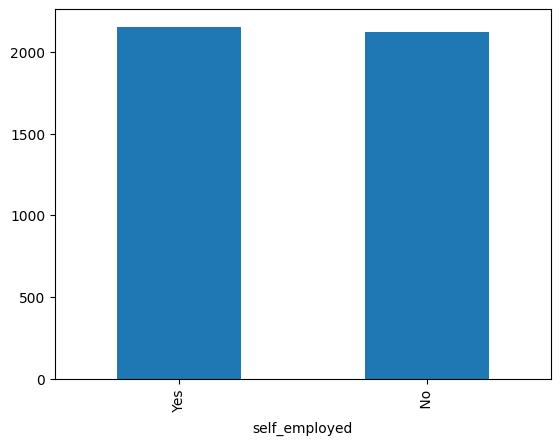

In [17]:
data['self_employed'].value_counts().plot(kind='bar')
plt.show()
#balanced in Self Employed

**Checking Outliers**

<Figure size 1000x600 with 0 Axes>

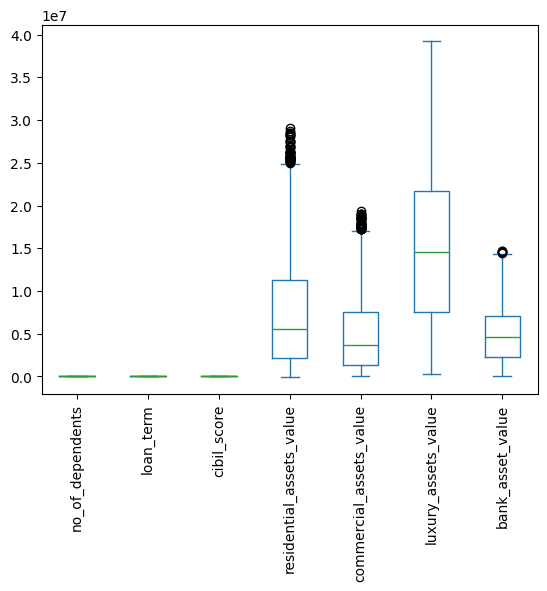

In [18]:
num_cols = data.select_dtypes(include='number')
plt.figure(figsize=(10,6))
num_cols.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [19]:
columnswout = data[['residential_assets_value','commercial_assets_value','bank_asset_value']]
q1=  columnswout.quantile(.25)
q3 = columnswout.quantile(.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
outliers = columnswout[columnswout>upper_bound]

# Drop rows where all three values are NaN
outliers = outliers.dropna(how='all')
outliers

,residential_assets_value,commercial_assets_value,bank_asset_value
0,NaN,17600000.0,NaN
82,25500000.0,NaN,NaN
98,25900000.0,NaN,NaN
123,26800000.0,NaN,NaN
157,NaN,18700000.0,NaN
...,...,...,...
4042,27400000.0,NaN,NaN
4074,27300000.0,NaN,NaN
4120,NaN,17900000.0,NaN
4205,NaN,17600000.0,NaN


In [20]:
data.shape

(4269, 10)

In [21]:
outlier_indices = outliers.dropna(how='all').index

data.drop(outlier_indices, inplace=True)


In [22]:
data.shape

(4178, 10)

**Splitting Data**

In [23]:
X= data.drop(['loan_status'],axis=1)
y=data['loan_status']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape

(3342, 9)

In [25]:
X_test.shape,y_test.shape

((836, 9), (836,))

**Building Pipeline**

In [26]:
# Identify categorical features - ensure correct column names without leading spaces
categorical_features = ['education', 'self_employed']

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough' # Keep other columns (numerical) as they are
)

#

In [27]:
C_model = Pipeline([('preprocessor', preprocessor),
                    ('Smote', SMOTE()),
                    ('Model', CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, loss_function='Logloss', eval_metric='AUC', auto_class_weights='Balanced', verbose=0, thread_count=-1))])

**Building the best model**

In [29]:
C_model = C_model.fit(X_train,y_train)

**Final Report**

In [31]:
C_model.score(X_test,y_test)

np.float64(0.965311004784689)

In [33]:
C_model.score(X_train,y_train)

np.float64(1.0)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    Approved       0.97      0.97      0.97       514
    Rejected       0.96      0.95      0.95       322

    accuracy                           0.97       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.97      0.97      0.97       836



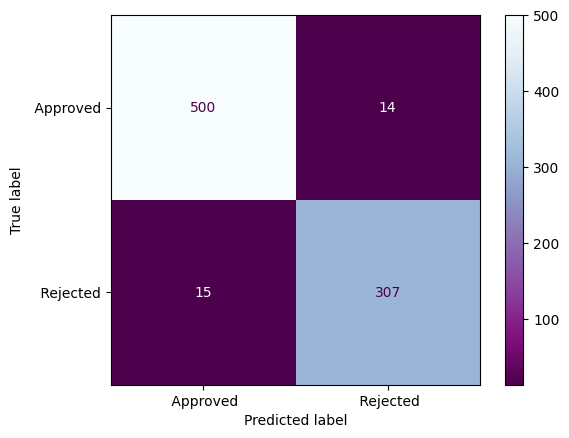

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=C_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=C_model.classes_,)
disp.plot(cmap='BuPu_r')
plt.show()